# Churn Project
# Data Preperation & Correlations

# Load Data

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
churn = pd.read_csv(r'C:\Users\User\Desktop\python DBA proj 2022\Python Data Analysis\\churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
churn.shape

(7043, 21)

# Data cleaning

Rename columns to lower letters

In [77]:
churn = churn.rename(columns=str.lower)
churn.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
churn.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

Change Labels to numeric

In [79]:
churn.partner = (churn.partner=='Yes').astype('int')
churn.dependents = (churn.dependents=='Yes').astype('int')
churn.phoneservice = (churn.phoneservice=='Yes').astype('int')
churn.multiplelines = (churn.multiplelines=='Yes').astype('int')
churn.onlinesecurity = (churn.onlinesecurity=='Yes').astype('int')
churn.onlinebackup = (churn.onlinebackup=='Yes').astype('int')
churn.deviceprotection = (churn.deviceprotection=='Yes').astype('int')
churn.techsupport = (churn.techsupport=='Yes').astype('int')
churn.streamingtv = (churn.streamingtv=='Yes').astype('int')
churn.streamingmovies = (churn.streamingmovies=='Yes').astype('int')
churn.paperlessbilling = (churn.paperlessbilling=='Yes').astype('int')
churn.churn = (churn.churn=='Yes').astype('int')

churn['totalcharges'] = pd.to_numeric(churn['totalcharges'], errors='coerce')

churn.head()


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [80]:
churn=churn.drop(['customerid'], axis=1)
churn.head()


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [81]:
pd.set_option('display.max_rows', None)  
churn.head(10)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,Female,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
6,Male,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,Female,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
8,Female,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,Male,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


Check for missing values

In [82]:
## Missing values in perecentege
churn.isna().mean()

gender              0.000000
seniorcitizen       0.000000
partner             0.000000
dependents          0.000000
tenure              0.000000
phoneservice        0.000000
multiplelines       0.000000
internetservice     0.000000
onlinesecurity      0.000000
onlinebackup        0.000000
deviceprotection    0.000000
techsupport         0.000000
streamingtv         0.000000
streamingmovies     0.000000
contract            0.000000
paperlessbilling    0.000000
paymentmethod       0.000000
monthlycharges      0.000000
totalcharges        0.001562
churn               0.000000
dtype: float64

In [83]:
# Missing values in Values
churn.isnull().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [84]:
#total charges should be removed from model and then there will be no missing values 

Check all values are indeed numeric

In [85]:
churn.dtypes

gender               object
seniorcitizen         int64
partner               int32
dependents            int32
tenure                int64
phoneservice          int32
multiplelines         int32
internetservice      object
onlinesecurity        int32
onlinebackup          int32
deviceprotection      int32
techsupport           int32
streamingtv           int32
streamingmovies       int32
contract             object
paperlessbilling      int32
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

# Finding correlations and relationships in the data

Label distribution

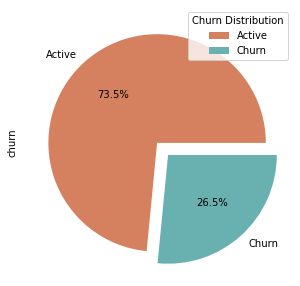

In [86]:
y=churn.churn.value_counts(normalize=True)
c = ["#d5815f", "#69b0b1"]
plt.figure(figsize=(5,5))
e = [0,0.15]
y_list = y.tolist()
l_list = ["Active","Churn"]
y.plot(labels = l_list,kind='pie', colors = c, explode = e, autopct='%1.1f%%');
plt.legend(title = "Churn Distribution", loc="upper right")

plt.savefig('churn distribution pie chart.png')

26.5% of clients churned

statistics of the data

In [87]:
churn.describe()

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,totalcharges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [88]:
churn.loc[(churn['paymentmethod'] == 'Electronic check') | (churn['paymentmethod'] == 'Mailed check'),'PaymentGroup'] = 'regular check'
churn.loc[(churn['paymentmethod'] == 'Bank transfer (automatic)') | (churn['paymentmethod'] =='Credit card (automatic)'),'PaymentGroup'] = 'automatic check'
churn.head(10)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,PaymentGroup
0,Female,0,1,0,1,0,0,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,regular check
1,Male,0,0,0,34,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,regular check
2,Male,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,regular check
3,Male,0,0,0,45,0,0,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,automatic check
4,Female,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,regular check
5,Female,0,0,0,8,1,1,Fiber optic,0,0,...,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,regular check
6,Male,0,0,1,22,1,1,Fiber optic,0,1,...,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,automatic check
7,Female,0,0,0,10,0,0,DSL,1,0,...,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0,regular check
8,Female,0,1,0,28,1,1,Fiber optic,0,0,...,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,regular check
9,Male,0,0,1,62,1,0,DSL,1,1,...,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0,automatic check


In [89]:
churn.groupby('internetservice').agg({'churn':['count','sum','mean']})


churn                
                count   sum      mean
internetservice                      
DSL              2421   459  0.189591
Fiber optic      3096  1297  0.418928
No               1526   113  0.074050

We can see than the average tenure of clients is 32 years and the longest tenure is 72 years.
The average monthly charge is 30, the lowest is 18 and highest is 118.


In [90]:
contract_distribution = churn.contract.value_counts(normalize=True).sort_index()
contract_distribution


Month-to-month    0.550192
One year          0.209144
Two year          0.240664
Name: contract, dtype: float64

In [91]:
paymentmethod_distribution = churn.paymentmethod.value_counts(normalize=True).sort_index()
paymentmethod_distribution



Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Electronic check             0.335794
Mailed check                 0.228880
Name: paymentmethod, dtype: float64

In [92]:
churned_by_contract_distribution = churn.groupby('contract').churn.mean()
churned_by_contract_distribution

contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: churn, dtype: float64

In [93]:
contract_stats = pd.DataFrame({'contract_dist':contract_distribution, 'churn':churned_by_contract_distribution})
contract_stats


,contract_dist,churn
contract,,
Month-to-month,0.550192,0.427097
One year,0.209144,0.112695
Two year,0.240664,0.028319


In [94]:
churn.loc[(churn['tenure'] <3),'TenureGroup'] = '0-3'
churn.loc[(churn['tenure'] >=3.) &(churn['tenure'] <5),'TenureGroup'] = '3-5'
churn.loc[(churn['tenure'] >=5.) & (churn['tenure'] <10.),'TenureGroup'] = '5-10'
churn.loc[(churn['tenure'] >=10.) & (churn['tenure'] <20.),'TenureGroup'] = '10-20'
churn.loc[(churn['tenure'] >=20.) & (churn['tenure'] <30.),'TenureGroup'] = '20-30'
churn.loc[(churn['tenure'] >= 30.),'TenureGroup'] = '30+'

churn.head(10)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,PaymentGroup,TenureGroup
0,Female,0,1,0,1,0,0,DSL,0,1,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,regular check,0-3
1,Male,0,0,0,34,1,0,DSL,1,0,...,0,0,One year,0,Mailed check,56.95,1889.50,0,regular check,30+
2,Male,0,0,0,2,1,0,DSL,1,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,regular check,0-3
3,Male,0,0,0,45,0,0,DSL,1,0,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,automatic check,30+
4,Female,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,regular check,0-3
5,Female,0,0,0,8,1,1,Fiber optic,0,0,...,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,regular check,5-10
6,Male,0,0,1,22,1,1,Fiber optic,0,1,...,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,automatic check,20-30
7,Female,0,0,0,10,0,0,DSL,1,0,...,0,0,Month-to-month,0,Mailed check,29.75,301.90,0,regular check,10-20
8,Female,0,1,0,28,1,1,Fiber optic,0,0,...,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,regular check,20-30
9,Male,0,0,1,62,1,0,DSL,1,1,...,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0,automatic check,30+


In [95]:
churn.groupby('TenureGroup').agg({'churn':['count','sum','mean']})


churn               
            count  sum      mean
TenureGroup                     
0-3           862  503  0.583527
10-20         953  310  0.325289
20-30         762  176  0.230971
3-5           376  177  0.470745
30+          3474  460  0.132412
5-10          616  243  0.394481

In [96]:
xl = churn[['TenureGroup','totalcharges']].groupby('TenureGroup', as_index = False).totalcharges.sum()
xl['TenureGroup'] = xl['TenureGroup'].astype('string') 

In [97]:
xl.dtypes

TenureGroup      string
totalcharges    float64
dtype: object

In [98]:
xl

,TenureGroup,totalcharges
0,0-3,58158.90
1,10-20,809000.30
2,20-30,1159672.20
3,3-5,75511.40
4,30+,13697484.25
5,5-10,256341.65


In [99]:
xl.set_index('TenureGroup')


,totalcharges
TenureGroup,
0-3,58158.90
10-20,809000.30
20-30,1159672.20
3-5,75511.40
30+,13697484.25
5-10,256341.65


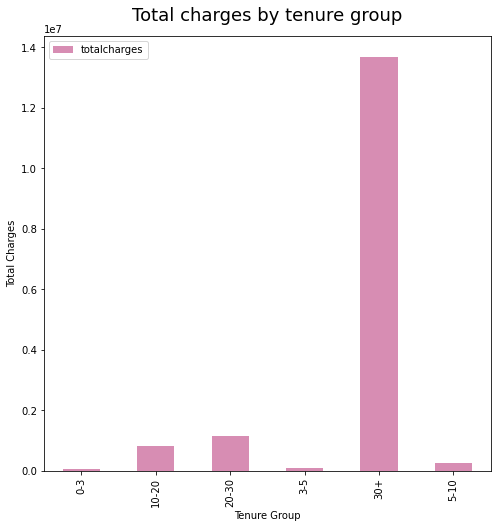

In [100]:
xl.plot.bar(x='TenureGroup', y='totalcharges',color='#d78db3', figsize=(8,8))

plt.xlabel('Tenure Group')
plt.ylabel('Total Charges')
plt.title('Total charges by tenure group',fontsize = 18, pad=15);


plt.savefig('Total charges by tenure group.png')

In [101]:
churn=churn.drop(['gender','multiplelines','phoneservice','streamingtv','streamingmovies'], axis=1)
churn.head()

,seniorcitizen,partner,dependents,tenure,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,PaymentGroup,TenureGroup
0,0,1,0,1,DSL,0,1,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,regular check,0-3
1,0,0,0,34,DSL,1,0,1,0,One year,0,Mailed check,56.95,1889.50,0,regular check,30+
2,0,0,0,2,DSL,1,1,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,regular check,0-3
3,0,0,0,45,DSL,1,0,1,1,One year,0,Bank transfer (automatic),42.30,1840.75,0,automatic check,30+
4,0,0,0,2,Fiber optic,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,regular check,0-3


In [102]:
churn = pd.get_dummies(churn)
churn.head(10)


,seniorcitizen,partner,dependents,tenure,onlinesecurity,onlinebackup,deviceprotection,techsupport,paperlessbilling,monthlycharges,...,paymentmethod_Electronic check,paymentmethod_Mailed check,PaymentGroup_automatic check,PaymentGroup_regular check,TenureGroup_0-3,TenureGroup_10-20,TenureGroup_20-30,TenureGroup_3-5,TenureGroup_30+,TenureGroup_5-10
0,0,1,0,1,0,1,0,0,1,29.85,...,1,0,0,1,1,0,0,0,0,0
1,0,0,0,34,1,0,1,0,0,56.95,...,0,1,0,1,0,0,0,0,1,0
2,0,0,0,2,1,1,0,0,1,53.85,...,0,1,0,1,1,0,0,0,0,0
3,0,0,0,45,1,0,1,1,0,42.30,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,2,0,0,0,0,1,70.70,...,1,0,0,1,1,0,0,0,0,0
5,0,0,0,8,0,0,1,0,1,99.65,...,1,0,0,1,0,0,0,0,0,1
6,0,0,1,22,0,1,0,0,1,89.10,...,0,0,1,0,0,0,1,0,0,0
7,0,0,0,10,1,0,0,0,0,29.75,...,0,1,0,1,0,1,0,0,0,0
8,0,1,0,28,0,0,1,1,1,104.80,...,1,0,0,1,0,0,1,0,0,0
9,0,0,1,62,1,1,0,0,0,56.15,...,0,0,1,0,0,0,0,0,1,0


In [103]:
churn.corr()

,seniorcitizen,partner,dependents,tenure,onlinesecurity,onlinebackup,deviceprotection,techsupport,paperlessbilling,monthlycharges,...,paymentmethod_Electronic check,paymentmethod_Mailed check,PaymentGroup_automatic check,PaymentGroup_regular check,TenureGroup_0-3,TenureGroup_10-20,TenureGroup_20-30,TenureGroup_3-5,TenureGroup_30+,TenureGroup_5-10
seniorcitizen,1.000000,0.016479,-0.211185,0.016567,-0.038653,0.066572,0.059428,-0.060625,0.156530,0.220173,...,0.171718,-0.153477,-0.033520,0.033520,-0.012660,-0.016359,0.012952,-0.017080,0.019033,0.000160
partner,0.016479,1.000000,0.452676,0.379697,0.143106,0.141498,0.153786,0.119999,-0.014877,0.096848,...,-0.083852,-0.095125,0.160475,-0.160475,-0.226600,-0.086663,-0.015615,-0.109482,0.321068,-0.096097
dependents,-0.211185,0.452676,1.000000,0.159712,0.080972,0.023671,0.013963,0.063268,-0.111377,-0.113890,...,-0.150642,0.059071,0.093439,-0.093439,-0.108993,-0.020396,0.000712,-0.056042,0.134677,-0.043388
tenure,0.016567,0.379697,0.159712,1.000000,0.327203,0.360277,0.360653,0.324221,0.006152,0.247900,...,-0.208363,-0.233852,0.396626,-0.396626,-0.473048,-0.293071,-0.113090,-0.279502,0.887460,-0.320151
onlinesecurity,-0.038653,0.143106,0.080972,0.327203,1.000000,0.283832,0.275438,0.354931,-0.003636,0.296594,...,-0.112338,-0.080798,0.175469,-0.175469,-0.171591,-0.086464,-0.025716,-0.089092,0.273892,-0.081785
onlinebackup,0.066572,0.141498,0.023671,0.360277,0.283832,1.000000,0.303546,0.294233,0.126735,0.441780,...,-0.000408,-0.174164,0.147965,-0.147965,-0.189839,-0.096647,-0.041158,-0.083280,0.310017,-0.099862
deviceprotection,0.059428,0.153786,0.013963,0.360653,0.275438,0.303546,1.000000,0.333313,0.103797,0.482692,...,-0.003351,-0.187373,0.161961,-0.161961,-0.201957,-0.088021,-0.042382,-0.093478,0.314685,-0.095050
techsupport,-0.060625,0.119999,0.063268,0.324221,0.354931,0.294233,0.333313,1.000000,0.037880,0.338304,...,-0.114839,-0.085509,0.181843,-0.181843,-0.185340,-0.085583,-0.021296,-0.069750,0.272684,-0.085015
paperlessbilling,0.156530,-0.014877,-0.111377,0.006152,-0.003636,0.126735,0.103797,0.037880,1.000000,0.352150,...,0.208865,-0.205398,-0.024909,0.024909,-0.018948,0.003898,0.002538,0.005559,0.004410,0.002243
monthlycharges,0.220173,0.096848,-0.113890,0.247900,0.296594,0.441780,0.482692,0.338304,0.352150,1.000000,...,0.271625,-0.377437,0.061086,-0.061086,-0.155594,-0.064478,-0.027426,-0.055402,0.218790,-0.054377


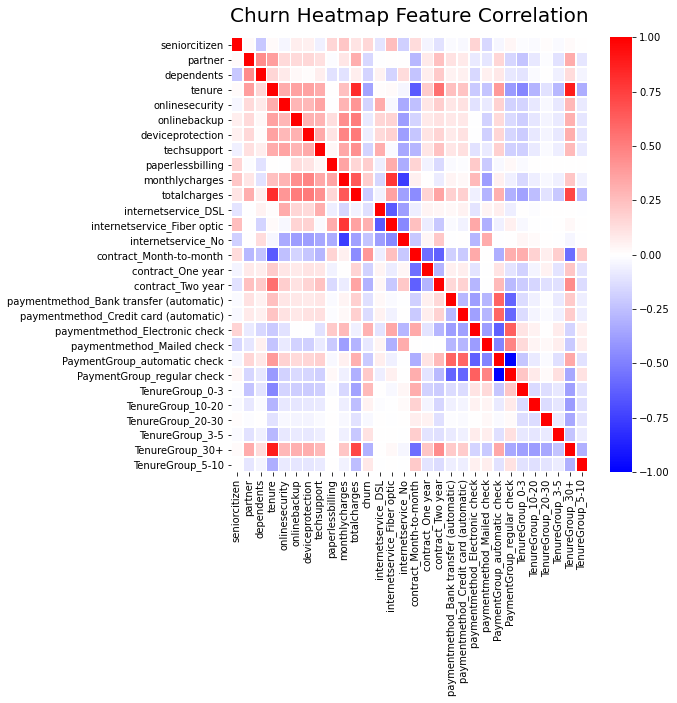

In [104]:
#Heat Map Feature Correlation Matrix

y=churn.corr().drop('churn')
fig, ax = plt.subplots(figsize=(8,8))   
heatmap=sns.heatmap(y,cmap='bwr',linewidth=.5)
title=plt.title('Churn Heatmap Feature Correlation', fontsize = 20, pad=15) 


plt.savefig('Churn Feature Correlation Heatmap Chart.png')





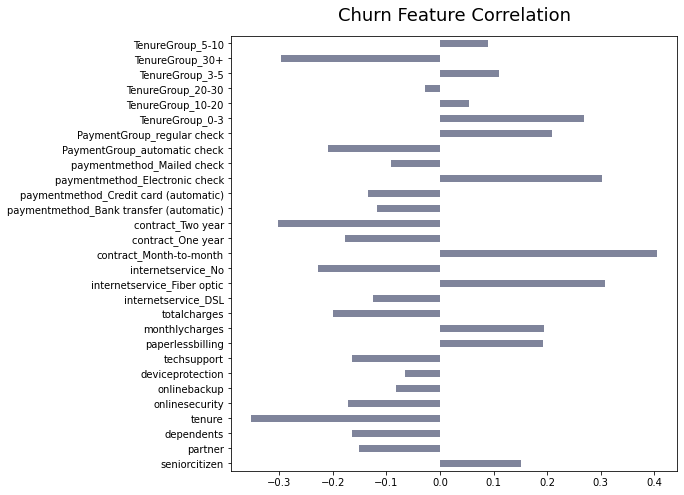

In [105]:
churn_corr=churn.corr()['churn'].drop('churn').plot(kind='barh',color='#000a39', alpha=0.5, figsize=(8,8))
title=plt.title('Churn Feature Correlation',fontsize = 18, pad=15) 

plt.savefig('Churn Feature Correlation Chart.png')

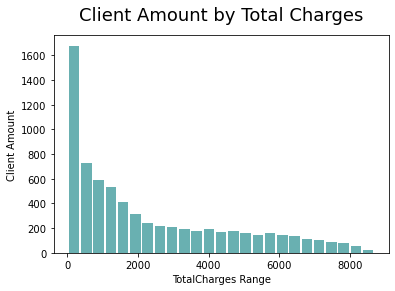

In [106]:
# Client Amount by Total Charges

plt.hist(x=churn['totalcharges'].dropna(), bins='auto', color='#69b0b1', rwidth=0.85)
plt.xlabel('TotalCharges Range')
plt.ylabel('Client Amount')
plt.title('Client Amount by Total Charges',fontsize = 18, pad=15);


plt.savefig('Client Amount by Total Charges.png')


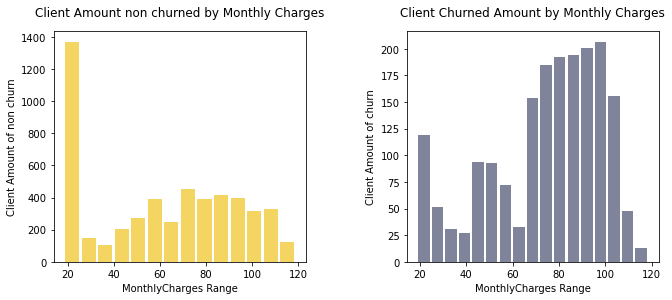

In [107]:
not_churn = churn.where(churn['churn'] == 0)
plt.subplot(1, 2, 1)
plt.hist(x = not_churn['monthlycharges'].dropna(), bins='auto', color='#f4d562', rwidth=0.85)
plt.xlabel('MonthlyCharges Range')
plt.ylabel('Client Amount of non churn')
plt.title('Client Amount non churned by Monthly Charges',pad=15);

is_churn = churn.where(churn['churn'] == 1)
plt.subplot(1, 2, 2)
plt.hist(x = is_churn['monthlycharges'].dropna(), bins='auto', color='#000a39',alpha=0.5, rwidth=0.85)
plt.xlabel('MonthlyCharges Range')
plt.ylabel('Client Amount of churn')
plt.title('Client Churned Amount by Monthly Charges',pad=15);

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.5,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


plt.savefig('Comparison - Client Amount by Monthly Charges.png')
#not normilized - clients amount in non-churned is much higer.

It can be seen that client that had higher monthly charge - churned.


clients with month to month payment method are most likely to churn

In [108]:
is_churn1 = churn[['contract_Month-to-month']].where(churn['churn'] == 1).sum()
is_churn2 = churn[['contract_Two year']].where(churn['churn'] == 1).sum()
is_churn3 = churn[['contract_One year']].where(churn['churn'] == 1).sum()

is_churn=[is_churn1,is_churn2,is_churn3]
is_churn

[contract_Month-to-month    1655.0
 dtype: float64,
 contract_Two year    48.0
 dtype: float64,
 contract_One year    166.0
 dtype: float64]

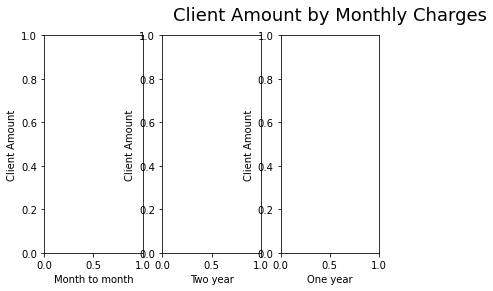

In [109]:
fig,ax = plt.subplots() 
is_churn_month= churn[['contract_Month-to-month']].where(churn['churn'] == 1).sum()

plt.subplot(1, 3, 1) # Plot histogram of nums1
ax.hist(x=is_churn_month['contract_Month-to-month'], label="Churn", histtype="step", density=True) # Plot histogram of nums2
plt.xlabel('Month to month')
plt.ylabel('Client Amount')


is_churn_two_year = churn[['contract_Two year']].where(churn['churn'] == 1).sum()
plt.subplot(1, 3, 2)
ax.hist(x=is_churn_two_year['contract_Two year'], label="Churn", histtype="step", density=True) # Plot histogram of nums2
plt.xlabel('Two year')
plt.ylabel('Client Amount')


is_churn_one_year = churn[['contract_One year']].where(churn['churn'] == 1).sum()
plt.subplot(1, 3, 3)
ax.hist(x=is_churn_one_year['contract_One year'], label="Churn", histtype="step", density=True) # Plot histogram of nums2
plt.xlabel('One year')
plt.ylabel('Client Amount')


plt.title('Client Amount by Monthly Charges',fontsize = 18,pad=15);
plt.savefig('Client Amount by Monthly Charges.png')
#Grapghs are normalized because of difference in clients amount. (using density=true)

In [110]:
churn.totalcharges = churn.totalcharges.fillna(churn.totalcharges.median())
churn.iloc[:10]

#checking if there are still missing values
#churn.isna().sum()


,seniorcitizen,partner,dependents,tenure,onlinesecurity,onlinebackup,deviceprotection,techsupport,paperlessbilling,monthlycharges,...,paymentmethod_Electronic check,paymentmethod_Mailed check,PaymentGroup_automatic check,PaymentGroup_regular check,TenureGroup_0-3,TenureGroup_10-20,TenureGroup_20-30,TenureGroup_3-5,TenureGroup_30+,TenureGroup_5-10
0,0,1,0,1,0,1,0,0,1,29.85,...,1,0,0,1,1,0,0,0,0,0
1,0,0,0,34,1,0,1,0,0,56.95,...,0,1,0,1,0,0,0,0,1,0
2,0,0,0,2,1,1,0,0,1,53.85,...,0,1,0,1,1,0,0,0,0,0
3,0,0,0,45,1,0,1,1,0,42.30,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,2,0,0,0,0,1,70.70,...,1,0,0,1,1,0,0,0,0,0
5,0,0,0,8,0,0,1,0,1,99.65,...,1,0,0,1,0,0,0,0,0,1
6,0,0,1,22,0,1,0,0,1,89.10,...,0,0,1,0,0,0,1,0,0,0
7,0,0,0,10,1,0,0,0,0,29.75,...,0,1,0,1,0,1,0,0,0,0
8,0,1,0,28,0,0,1,1,1,104.80,...,1,0,0,1,0,0,1,0,0,0
9,0,0,1,62,1,1,0,0,0,56.15,...,0,0,1,0,0,0,0,0,1,0


In [111]:
churn1 = pd.read_csv(r'C:\Users\User\Desktop\python DBA proj 2022\Python Data Analysis\\churn.csv')
churn1.head()
#df_er = pd.merge(churn, churn1, left_index=True , right_index=True)
churn['customerid1'] = churn.reset_index().index

churn = churn.astype(float)

churn.head()

,seniorcitizen,partner,dependents,tenure,onlinesecurity,onlinebackup,deviceprotection,techsupport,paperlessbilling,monthlycharges,...,paymentmethod_Mailed check,PaymentGroup_automatic check,PaymentGroup_regular check,TenureGroup_0-3,TenureGroup_10-20,TenureGroup_20-30,TenureGroup_3-5,TenureGroup_30+,TenureGroup_5-10,customerid1
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,29.85,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,34.0,1.0,0.0,1.0,0.0,0.0,56.95,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,53.85,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,45.0,1.0,0.0,1.0,1.0,0.0,42.30,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
4,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,70.70,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0


In [112]:
from sklearn.model_selection import train_test_split
test_size = 1409


train, test = train_test_split(churn, test_size=test_size, random_state=0)

label = 'churn'
cust = 'customerid1'

x_train = train.drop(label, axis=1)
x_train = x_train.drop(cust, axis=1)
y_train = train[label]
cust_train = train[cust]

x_test = test.drop(label, axis=1)
x_test = x_test.drop(cust, axis=1)
y_test = test[label]
cust_test = test[cust]


train.head()

,seniorcitizen,partner,dependents,tenure,onlinesecurity,onlinebackup,deviceprotection,techsupport,paperlessbilling,monthlycharges,...,paymentmethod_Mailed check,PaymentGroup_automatic check,PaymentGroup_regular check,TenureGroup_0-3,TenureGroup_10-20,TenureGroup_20-30,TenureGroup_3-5,TenureGroup_30+,TenureGroup_5-10,customerid1
2920,0.0,1.0,0.0,72.0,1.0,1.0,1.0,1.0,0.0,85.10,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2920.0
2966,1.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,1.0,46.35,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2966.0
6099,0.0,1.0,1.0,71.0,0.0,0.0,0.0,0.0,0.0,24.70,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6099.0
5482,0.0,1.0,1.0,33.0,0.0,0.0,1.0,1.0,1.0,73.90,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5482.0
2012,0.0,1.0,0.0,47.0,1.0,1.0,1.0,0.0,1.0,98.75,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2012.0


In [113]:
test.head()

,seniorcitizen,partner,dependents,tenure,onlinesecurity,onlinebackup,deviceprotection,techsupport,paperlessbilling,monthlycharges,...,paymentmethod_Mailed check,PaymentGroup_automatic check,PaymentGroup_regular check,TenureGroup_0-3,TenureGroup_10-20,TenureGroup_20-30,TenureGroup_3-5,TenureGroup_30+,TenureGroup_5-10,customerid1
2200,0.0,0.0,0.0,19.0,0.0,1.0,0.0,0.0,0.0,58.20,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2200.0
4627,0.0,0.0,0.0,60.0,1.0,1.0,1.0,1.0,1.0,116.60,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4627.0
3225,0.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,1.0,71.95,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3225.0
2828,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.45,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2828.0
3768,0.0,1.0,0.0,55.0,0.0,1.0,0.0,0.0,1.0,77.75,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3768.0


In [114]:
x_train.shape, y_train.shape, cust_train.shape, x_test.shape, y_test.shape, cust_test.shape

((5634, 29), (5634,), (5634,), (1409, 29), (1409,), (1409,))

In [115]:
from sklearn.tree import DecisionTreeClassifier # Importing the algorithm

clf = DecisionTreeClassifier(max_depth=3)
# define the algorithm:
    # arg:
        # max_depth = The maximum depth of the tree. (If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)


clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_DecisionTree = clf.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'customerid1': cust_test, 'actualy_decided_to_churn_or_not':y_test, 'churned_predicted_by_model': y_test_pred_DecisionTree}) # saving results to DataFrame
output.to_csv('my_DecisionTree_Prediction.csv', index=False) # saving results to csv

In [116]:
output.head(100)

,customerid1,actualy_decided_to_churn_or_not,churned_predicted_by_model
2200,2200.0,0.0,0.0
4627,4627.0,0.0,0.0
3225,3225.0,0.0,0.0
2828,2828.0,0.0,0.0
3768,3768.0,0.0,0.0
4446,4446.0,1.0,1.0
2234,2234.0,0.0,0.0
5454,5454.0,1.0,1.0
1278,1278.0,0.0,0.0
578,578.0,0.0,0.0


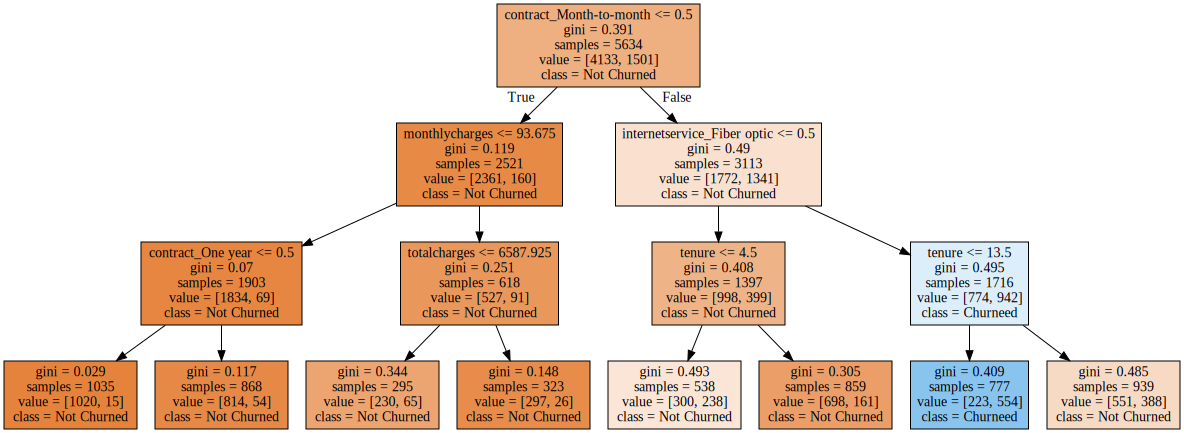

In [117]:
# Plotting the decision tree

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

    
plot_tree(clf, x_train.columns, ['Not Churned', 'Churneed'])


In [118]:
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm Random Forest

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
# define the algorithm:
    # arg:
        # n_estimators = number of trees
        # max_dept = the maximum depth of the trees
        # random_state =
            # basically, an algorithm is repeated a number of times using random selections of features and samples. 
            # The random_state parameter allows controlling these random choices.
            # if you call this with random_state=1 (or any other value), then each and every time, you'll get the same result.
            
model.fit(x_train, y_train) 

y_test_pred_RandomForest = model.predict(x_test) 


output = pd.DataFrame({'customerid': cust_test, 'actually_churned_or_not':y_test, 'churned_predicted_by_model': y_test_pred_RandomForest}) # saving results to DataFrame
output.to_csv('my_RandomForest_Prediction.csv', index=False)



In [119]:
feature_importances = model.feature_importances_ 
feature_importances 

array([1.83533508e-03, 2.45413259e-03, 5.50932013e-03, 1.21520513e-01,
       5.47198806e-03, 2.96672994e-03, 2.84239511e-03, 4.30250052e-03,
       8.61440612e-03, 5.20443196e-02, 5.22308245e-02, 1.34896678e-02,
       1.32682935e-01, 4.73003119e-02, 2.12291572e-01, 1.92717557e-02,
       7.36532221e-02, 1.21183252e-04, 2.70645782e-05, 6.84912035e-02,
       2.30591323e-03, 1.51824892e-02, 1.82921233e-02, 5.88390192e-02,
       2.48857769e-04, 6.38733329e-04, 1.10221066e-03, 7.56435325e-02,
       6.25740638e-04])

In [120]:
features = x_train.columns 
stats = pd.DataFrame({'feature':features, 'importance precentage':feature_importances*100}) 
stats.sort_values('importance precentage', ascending=False) 

,feature,importance precentage
14,contract_Month-to-month,21.229157
12,internetservice_Fiber optic,13.268293
3,tenure,12.152051
27,TenureGroup_30+,7.564353
16,contract_Two year,7.365322
19,paymentmethod_Electronic check,6.849120
23,TenureGroup_0-3,5.883902
10,totalcharges,5.223082
9,monthlycharges,5.204432
13,internetservice_No,4.730031


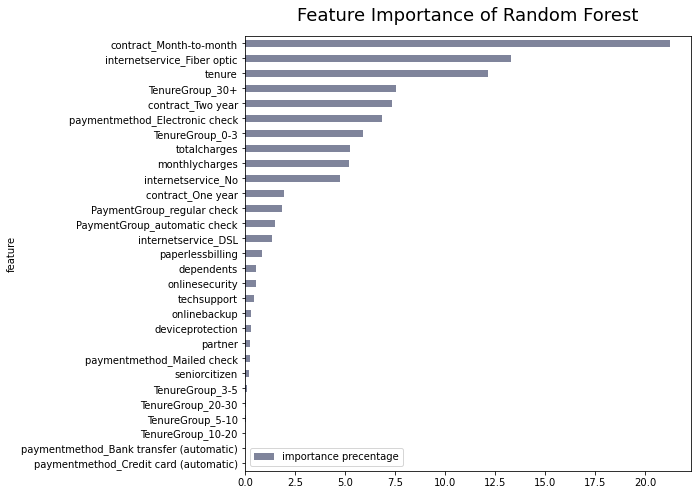

In [121]:
stats_sort = stats.sort_values('importance precentage', ascending=True)
stats_sort.plot(y='importance precentage', x='feature', kind='barh', color='#000a39',alpha=0.5, figsize=(8,8))
plt.title('Feature Importance of Random Forest',fontsize = 18, pad=15)

plt.savefig('Feature Importance of Random Forest.png')


In [122]:
from sklearn.neighbors import KNeighborsClassifier  # Importing the K Nearest Neighbor algorithm

clf = KNeighborsClassifier(n_neighbors=3)
        
clf.fit(x_train, y_train) 

y_test_pred_Knn = clf.predict(x_test)

output = pd.DataFrame({'customerid': cust_test, 'actually_churned_or_not':y_test, 'churned_predicted_by_model': y_test_pred_Knn}) # saving results to DataFrame
output.to_csv('my_Knn_Prediction.csv', index=False) # saving results to csv


In [123]:
from sklearn.metrics import accuracy_score 

In [124]:
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7785663591199432

In [125]:
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7771469127040455

In [126]:
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7430801987224982

We can see that the "Decision Tree" algo had the best result, "Knn" on the other hand did poorly

In [127]:
# What we saw in the beginning - DecisionTree 
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7842441447835344

In [128]:
# Overfitting the DecisionTree model
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7806955287437899

In [129]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7721788502484032

max_depth=5 --> looks like the best one

In [130]:
# What we saw in the beginning - Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7771469127040455

In [131]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7885024840312278

In [132]:
model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7984386089425124

In [133]:
# Overfitting the Random Forest model
model = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7778566359119943

In [134]:
model = RandomForestClassifier(n_estimators=81, max_depth=7, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.801277501774308

looks like "n_estimators" should be about 81 (n_estimators = 81 ~ 80% accuracy)
and "max_depth"  should be about 7

In [135]:
# What we saw in the beginning - KNN
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7430801987224982

In [136]:
# Overfitting the KNN model
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7551454932576295

In [137]:
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7714691270404542

In [138]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7771469127040455

In [139]:
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7707594038325053

In [140]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7679205110007097

The best result that we get was with 10 n_neigbors esstimator.
Let's scale the x values

In [141]:
from sklearn.preprocessing import StandardScaler # import the libraries

scaler = StandardScaler() # define

x_train_scaled = scaler.fit_transform(x_train) # Fit to data, then transform it.
x_test_scaled = scaler.transform(x_test) # Perform standardization by centering and scaling

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(x_train_scaled, y_train)

y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)


output = pd.DataFrame({'customerid': cust_test, 'actually_churned_or_not':y_test, 'churned_predicted_by_model': y_test_pred_Knn, 'churned_predicted_by_model_scaled':y_test_pred_Knn_Scaled}) 
output.to_csv('my_Knn_Prediction_scaled.csv', index=False) 


test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
test_acc

0.7750177430801988

In [142]:
y_train.value_counts()

0.0    4133
1.0    1501
Name: churn, dtype: int64

In [143]:
import numpy as np

def get_benchmark_predictions(x, benchmark_value): 
# The function returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value
    

benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark
# Our benchmark predicts that all customers churned

array([0., 0., 0., ..., 0., 0., 0.])

In [144]:
test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc


0.7388218594748048

The performance on test is 73.8%, we can see, that any of our algorithms beat the benchmark performance